In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes_data = pd.read_csv('data/diabetes_data.csv', sep=',')


Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [2]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


# Признаки данных

Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела

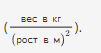

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

# Задание 8.1

Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [3]:
duplicates = diabetes[diabetes.duplicated()]
print('Число дубликтов: {}'.format(duplicates.shape[0]))
diabetes = diabetes.drop_duplicates()
print('Результирующее число записей: {}'.format(diabetes.shape[0]))

Число дубликтов: 10
Результирующее число записей: 768


# Задание 8.2
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

Примечание: дальнейшая работа производится с очищенными от дубликатов и неинформативных признаков данных.

In [4]:
def low_informative_feature(data):
    low_information_cols = []
    for col in data.columns:
        top_freq = data[col].value_counts(normalize=True).max()
        nunique_ratio = data[col].nunique() / data[col].count()
        if top_freq > 0.95:
            low_information_cols.append(col)
        if nunique_ratio > 0.95:
            low_information_cols.append(col)
    return low_information_cols
low_information_cols = low_informative_feature(diabetes)
print(low_information_cols)

['Gender']


# Задание 8.3

Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [5]:
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
Gender                      0.00
dtype: float64

# Задание 8.4

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [6]:
thresh = diabetes.shape[0]*0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)
print(diabetes.shape[1])

9


# Задание 8.5

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [9]:
m = diabetes.shape[1]
diabetes = diabetes.dropna(thresh=m-2, axis=0)
print(diabetes.shape[0])

761


# Задание 8.6

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [10]:
null_data = diabetes.isnull().sum()
cols = null_data[null_data>0].index
for col in cols:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())
print(diabetes['SkinThickness'].mean().round(1))

29.1


# Задание 8.7

Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

Примечание: дальнейшая работа производится с очищенными от дубликатов, неинформативных признаков данных и пропусков.

In [11]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'SkinThickness')
print(outliers.shape[0])

87


# Задание 8.8

Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [12]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_z_score_mod(diabetes, 'SkinThickness')
print(outliers.shape[0])

4


# Задание 8.9

На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

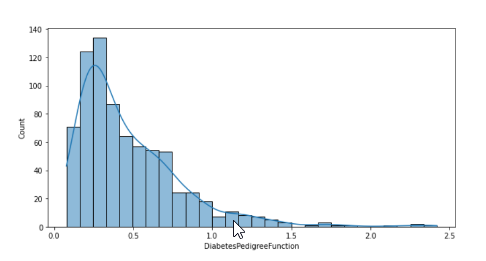

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [14]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

29
